### Question 1.

* You collected data about coral cover (number of coral heads from a species X) in 100 quadrats in 2018 in region Y.
 * Quadrat size in not relevant or important
* You hypothesize that the environmental stressor that occurred earlier caused a deciline in species X's coverage in the region Y
* You re-assessed the coral coverage in 25 of the quadrats you initially sampled in 2018 

* Use sampling to conclude whether the average coverage has decrease between 2018 and after the stressor event.
  * Plot your result and compute the p-value of the event.
  * i.e., what does the null distrubution for averages look like and where does your actual observer value occur

* Use the data is below. 


In [1]:
library(tidyverse)
data = read_csv("data/survey_2018.csv")

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Parsed with column specification:
cols(
  transect_id = col_double(),
  coverage = col_double()
)


In [4]:
data

transect_id,coverage
1,26
2,32
3,21
4,21
5,26
6,23
7,15
8,18
9,24
10,23


In [19]:
data2018 = as_tibble(data)
print(data2018)

# A tibble: 100 x 2
   transect_id coverage
         <dbl>    <dbl>
 1           1       26
 2           2       32
 3           3       21
 4           4       21
 5           5       26
 6           6       23
 7           7       15
 8           8       18
 9           9       24
10          10       23
# ... with 90 more rows


In [24]:
data2018 <- read_csv("data/survey_2018.csv",
                      col_types = cols(
                        transect_id = col_integer(),
                        coverage = col_double()
                      ))
print(data2018)

# A tibble: 100 x 2
   transect_id coverage
         <int>    <dbl>
 1           1       26
 2           2       32
 3           3       21
 4           4       21
 5           5       26
 6           6       23
 7           7       15
 8           8       18
 9           9       24
10          10       23
# ... with 90 more rows


In [26]:
sample(data2018$coverage, 25)

[1] 12 29 16 19 12 18 27 18 20 37 20 25 21 22 25 22 26 26 18 18 14 22 19 22 26

In [30]:
n = 1000

sample_means = n %>%
  replicate(sample(data2018$coverage, 25)) %>%
  t() %>%
  apply(  1, mean)

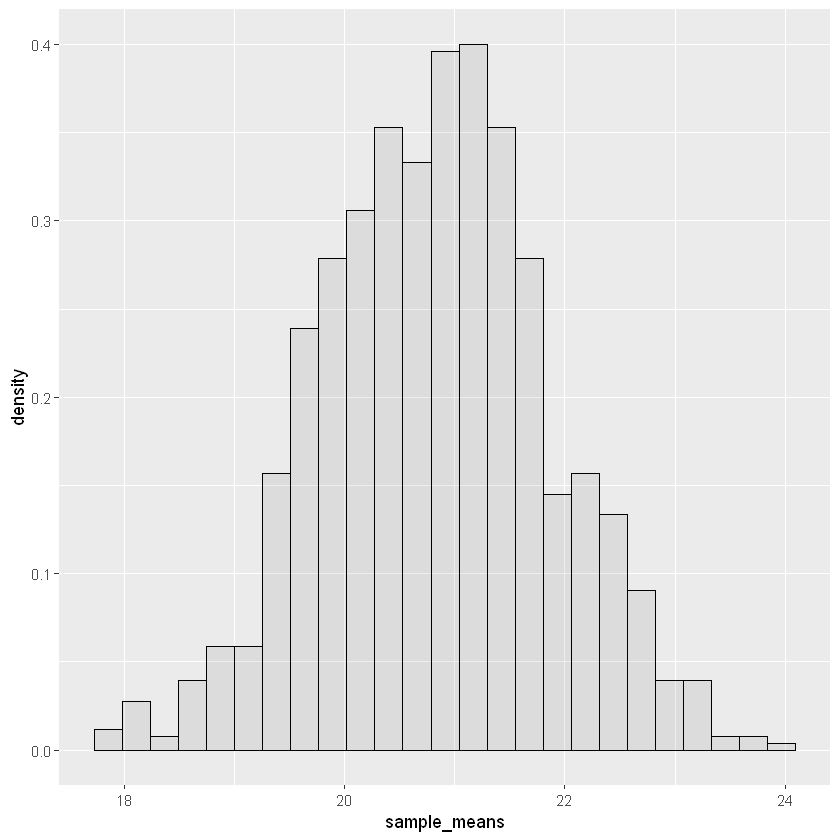

In [32]:
ggplot() + 
  geom_histogram(aes(x=sample_means, y=..density..), bins = 25, alpha=0.1, color="black", size=0.05) 

In [35]:
mean2021 = 24
mean(sample_means)

[1] 20.82492

In [36]:
sum(sample_means > 24 )

[1] 0